In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


input_data = pd.read_excel('/Users/dylan/DataBase/signal_process/50ETF-signalout copy.xlsx')
signal_input = pd.read_excel('/Users/dylan/DataBase/signal_process/signal_result-30 copy.xlsx')

# 加权选择

signal_input_quantile = signal_input[['annual_return_sp','win_rate_sp','pc_ratio_sp']].quantile([0.25,0.5,0.75])
for col_name in ['annual_return_sp','win_rate_sp','pc_ratio_sp']:
    def get_weight_group(x) :
        if x < signal_input_quantile[col_name].loc[0.25]: 
            return 1
        elif signal_input_quantile[col_name].loc[0.25] < x  and  x < signal_input_quantile[col_name].loc[0.5]: 
            return 2 
        elif signal_input_quantile[col_name].loc[0.5] < x and  x < signal_input_quantile[col_name].loc[0.75] : 
            return 3         
        else : 
            return 4 
    new_weighte_col_name = col_name + '_weight'
    signal_input[new_weighte_col_name] = signal_input[col_name].map(get_weight_group)

signal_input['Max_method'] = signal_input[['annual_return_sp_weight','win_rate_sp_weight','pc_ratio_sp_weight']].sum(axis = 1)

signal_input['Max_method'].sort_values(ascending = False)

# 至少选择当期Top3
signal_input.sort_values(by = 'Max_method', ascending = False ).groupby('start_date').head(3)



"""  #当期相同则计算上期method
if len(signal_input_filter['Max_method']) > 3:       
    signal_input_filter.sort_values(by=['model','start_date'],inplace=True) 
    signal_input_filter['Last_method'] = signal_input_filter['Max_method'].shift(1) 
    signal_output = signal_input_filter.nlargest(3,'Last_method',keep="first")
else:
    signal_output = signal_input_filter.sort_values(by="start_date").shift(1)

    signal_input_filter.sort_values(by='start_date',inplace=True)
    signal_input_filter['model_selected'] = signal_input_filter['model'].shift(1)
    
    signal_input_filter.to_excel('/Users/dylan/DataBase/signal_process/1.xlsx',index=False) """
# 选出当期Top3

signal_input_filter = signal_input.groupby(by = 'start_date').apply(lambda x : x.nlargest(3, 'Max_method', keep = 'all'))


""" # 权重相同则比较上一期
for i in ['start_date']:
    if len(signal_input) """
signal_output = pd.DataFrame()
for i in signal_input_filter['start_date'].drop_duplicates(): 
    column = signal_input_filter.loc[(i)].sample(1)
    signal_output = signal_output.append(column)

signal_output['model_selected'] = signal_output['model'].shift(1)

### 得到信号

        
df1 = signal_output[['annual_return_sp','win_rate_sp','pc_ratio_sp']]
df3 = pd.DataFrame()
for x in signal_output['model']:
    df2 = signal_output[(x == signal_input['model'])]
    for y in signal_output['start_date']: 
        new_column = df2[y == df2['start_date']]
        df3 = df3.append(new_column)

df4 = df3.drop_duplicates('start_date')
df4.rename(columns = {'annual_return_sp_weight' : 'a','win_rate_sp_weight' : 'b','pc_ratio_sp_weight' : 'c'}, inplace = True)
df1.rename(columns = {'annual_return_sp' : 'a','win_rate_sp' : 'b','pc_ratio_sp' : 'c'}, inplace = True)
signal_output['signal'] = df1.dot(df4[['a','b','c']].T)

In [ ]:
signal_output['signal'] = df1.dot(df4[['a','b','c']].T).T.iloc[0]
signal_output['signal']

In [10]:
# New
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

input_data = pd.read_excel(r'D:\Github repo\DataBase\signal_process\50-ETF-signalout.xlsx')
""" signal_input = pd.read_excel(r'D:\Github repo\DataBase\signal_process\signal_result-'+str(training_window)+' copy.xlsx')       """  
# 以下由于输入文件均有错误
""" signal_input_5 = pd.read_excel(r'D:\Github repo\DataBase\signal_process\signal_result-30_5.xlsx')
signal_input_benchmark = pd.read_excel(r'D:\Github repo\DataBase\signal_process\benchmark_result-30_5.xlsx')

signal_input_benchmark.rename(columns = {'sharpe_ratio' : 'sharpe_ratio_sp'},inplace = True)

def get_group_sprank(x):
    x['sp_rank_1'] = x['sharpe_ratio_sp'].rank(method='average',ascending=True)/len(x)
    return (x['sp_rank_1'])


signal_input['sp_rank'] = signal_input.groupby('start_date').apply(get_group_sprank).reset_index(drop = True)
signal_input_5['sp_rank'] = signal_input_5.apply(get_group_sprank).reset_index(drop = True)

# 重新计算一次sp_rank

signal_input_5_benchmark = pd.concat([signal_input_5, signal_input_benchmark])
signal_input_5_benchmark.sort_values(by  = 'sp_rank',inplace  = True)
signal_input_5_benchmark['sp_rank'] = signal_input_5_benchmark.apply(get_group_sprank).reset_index(drop = True)

matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
signal_input_5_benchmark.to_excel(r'D:\Github repo\DataBase\signal_process\5.xlsx') """

signal_input_5_benchmark= pd.read_excel(r'D:\Github repo\DataBase\signal_process\benchmark_result-30_5.xlsx')

<AxesSubplot:xlabel='start_date', ylabel='model'>

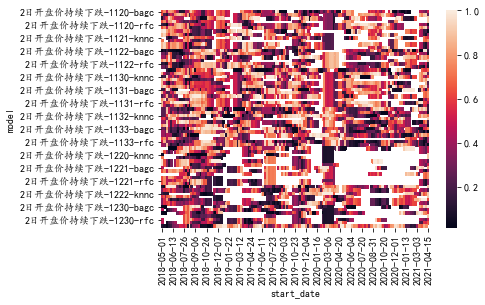

In [11]:
# 透视热力图
signal_input_5_benchmark = signal_input_5_benchmark.pivot_table(index = 'model', columns = 'start_date', values = 'sp_rank')
sns.heatmap(signal_input_5_benchmark)

In [ ]:
""" for model_name in signal_input['model'].drop_duplicates():
    model_data = signal_input.groupby('model').get_group(model_name).sort_values(by = 'start_date') 
    sns.relplot(x =range(len(model_data['start_date'].drop_duplicates())), y="sp_rank",kind = 'line', data=model_data)
 """
# 逐个绘制图例 sharpe_ratio
""" for model_name in signal_input_5['model'].drop_duplicates():
    model_data_5 = signal_input_5.groupby('model').get_group(model_name).sort_values(by = 'start_date') 
    sns.relplot(x =range(len(model_data_5['start_date'].drop_duplicates())), y="sp_rank",kind = 'line', data=model_data_5) """


In [ ]:
# 选取N个综合绘图
# 选取所有模型 进行综合绘图 no benchmark
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
counter = 0
current_max = '2010-01-01' 
for loc, i in enumerate(signal_input_5['start_date']):
    if i > current_max:
        current_max = i
        counter += 1
    signal_input_5['start_date'][loc] = counter
    
sns.relplot(x = 'start_date', y = 'sp_rank', hue = 'model' , data = signal_input_5,kind = 'line')



In [ ]:
# 选取N个综合绘图 with benchmark
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
counter = 0
current_max = '2010-01-01' 
for loc, i in enumerate(signal_input_5_benchmark['start_date']):
    if i > current_max:
        current_max = i
        counter += 1
    signal_input_5_benchmark['start_date'][loc] = counter
sns.relplot(x = 'start_date', y = 'sp_rank', hue = 'model' , data = signal_input_5_benchmark,kind = 'line')

In [ ]:
# 随机选取3个进行综合绘图
# 选取三个绘制线图 (no benchmark)

    
""" counter = 0
current_max = -1 
for loc, i in enumerate(signal_input_5['start_date']):
    if i > current_max:
        current_max = i
        counter += 1
    signal_input_5['start_date'][loc] = counter """
plt.figure(figsize = (15,10))
for i in range(4):
    signal_input_5_line = pd.DataFrame()
    for model in model_list:
        model_list = signal_input_5['model'].drop_duplicates().sample(3)
        new_row = signal_input_5[signal_input_5['model'] == model]
        signal_input_5_line  = signal_input_5_line.append(new_row)


In [ ]:
# 选取3个绘图 with benchmark
pd.options.mode.chained_assignment = None  # default='warn'
""" counter = 0
current_max = -1
for loc, i in enumerate(signal_input_5_benchmark['start_date']):
    if i > current_max:
        current_max = i
        counter += 1
    signal_input_5_benchmark['start_date'][loc] = counter
"""

for i in range(4):
    signal_input_5_line = pd.DataFrame()
    model_list = list(signal_input_5_benchmark['model'].drop_duplicates().sample(3))
    model_list.append('benchmark')
    for model in model_list:
        new_row = signal_input_5_benchmark[signal_input_5_benchmark['model'] == model]
        signal_input_5_line  = signal_input_5_line.append(new_row)
    image = sns.relplot(x= 'start_date', y = 'sp_rank', hue = 'model' , data = signal_input_5_line,kind = 'line')
    plt.xticks(rotation=-15)
    # 调账横轴坐标 拉长
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    N = len(signal_input_5_benchmark['start_date'].drop_duplicates())
    # maxsize = max([t.get_window_extent().width for t in tl])
    maxsize = 20
    m = 0.2  # inch margin
    s = maxsize / plt.gcf().dpi * N + 2 * m
    margin = m / plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1. - margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
    image.savefig('D:\Github repo\DataBase\signal_process' + str(i), dpi = 500)


In [13]:
# 选取3个绘图 with benchmark
# 制作交互式图表

""" counter = 0
current_max = -1
for loc, i in enumerate(signal_input_5_benchmark['start_date']):
    if i > current_max:
        current_max = i
        counter += 1
    signal_input_5_benchmark['start_date'][loc] = counter
"""

for i in range(4):
    signal_input_5_line = pd.DataFrame()
    model_list = list(signal_input_5_benchmark['model'].drop_duplicates().sample(2))
    model_list.append('benchmark')
    for model in model_list:
        new_row = signal_input_5_benchmark[signal_input_5_benchmark['model'] == model]
        signal_input_5_line  = signal_input_5_line.append(new_row)
        data = ColumnDataSource(signal_input_5_line)
        fig = figure()
        fig.multi_line(x = 'start_date', y = 'sp_rank',source = data)
        show(fig)



AttributeError: unexpected attribute 'x' to MultiLine, similar attributes are xs

In [ ]:
#拉长x轴坐标
plt.xticks(rotation=-15)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
N = len(signal_input_5_benchmark['start_date'].drop_duplicates())
# maxsize = max([t.get_window_extent().width for t in tl])
maxsize = 20
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

In [ ]:
# 选取3个绘制 violin图
""" signal_input_5_violin = pd.DataFrame()
for row_name in signal_input_5['start_date'].drop_duplicates():
    new_row = signal_input_5.groupby('start_date').get_group(row_name).sample(5)
    signal_input_5_violin = signal_input_5_violin.append(new_row)
 """
plt.figure(figsize=(150,100))
signal_input_5_violin = signal_input_5.groupby('start_date').get_group(1)
sns.violinplot(x = 'model',y = 'sp_rank',data = signal_input_5)


In [16]:
# 测试 Bokeh
import pandas as pd 
import pandas_bokeh
pandas_bokeh.output_file('Interactive Plot.html')
import numpy as np

signal_input_5_benchmark= pd.read_excel(r'D:\Github repo\DataBase\signal_process\benchmark_result-30_5.xlsx')
pd.options.mode.chained_assignment = None  # default='warn')

# 绘制可交互表
# 总表
signal_input_5_benchmark.pivot_table(index = 'start_date',columns = 'model',values = 'sp_rank').plot_bokeh(kind ='line',figsize = (1500,750),rangetool = True)
# 随机选择四个进行绘制

for i in range(4):
    signal_input_5_line = pd.DataFrame()
    model_list = list(signal_input_5_benchmark['model'].drop_duplicates().sample(3))
    model_list.append('benchmark')
    for model in model_list:
        new_row = signal_input_5_benchmark[signal_input_5_benchmark['model'] == model]
        signal_input_5_line  = signal_input_5_line.append(new_row)
        pandas_bokeh.output_file('Interactive Plot'+ str(i) + '.html')
    signal_input_5_line.pivot_table(index = 'start_date',columns = 'model',values = 'sp_rank').plot_bokeh(kind ='line',figsize = (1500,750),rangetool = True,toolbar_location = 'below')
    p.toolbar.autohide = True
    p.legend.spacing = 3




AttributeError: 'Column' object has no attribute 'toolbar'

In [ ]:
# 绘制全期的benchmark分布情况
signal_input_5_benchmark.pivot_table(index = 'start_date',columns = 'model',values = 'sp_rank').plot_bokeh(kind = )